# Analisis Eksplorasi Data Sosial, Ekonomi dan Demografi serta COVID-19

#### Task To do:
1. Analisis univariate (visualisasi data sosek-dem menggunakan histogram, liat kondisi terkini dan trend covid-19 di setiap daerah)
2. Analisis bivariate (buat heatmap korelasi antar variabel, hilangkan multikolinearitas)
3. Analisis multivariate (menggunakan OLS, x-> data sosek-dem, y-> kasus COVID-19 30 April 2021)

## Import Libraries

In [1]:
# math and statistic
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import linregress
import statsmodels.api as sm

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


## Read CSV data file

In [2]:
sosek_dem = pd.read_csv('data sosek-dem.csv')
sosek_dem.head()

Kabupaten/Kota  Jumlah rumah sakit umum  Jumlah dokter  \
0   Kabupaten Bangkalan                        3            110   
1  Kabupaten Banyuwangi                       12            316   
2      Kabupaten Blitar                        8            184   
3  Kabupaten Bojonegoro                        9            221   
4   Kabupaten Bondowoso                        3             88   

   Indeks pembangunan manusia  Persentase penduduk miskin      PDRB  \
0                       64.11                       20.56  17514.62   
1                       70.62                        8.06  53295.11   
2                       70.58                        9.33  24945.46   
3                       69.04                       12.87  69703.42   
4                       66.43                       14.17  13451.77   

   Total pengeluaran perkapita  Tingkat pengangguran terbuka  \
0                       791935                          8.77   
1                       990798                          5.34   
2                       885475                          3.82   
3                       904017                          4.92   
4                       807746                          4.13   

   Kepadatan penduduk  Jumlah populasi  Persentase penduduk perkotaan  \
0                1059          1060377                          30.84   
1                 295          1708114                          60.21   
2                 916          1223745                          45.00   
3                 592          1301635                          25.92   
4                 509           776151                          39.51   

   Rasio jenis kelamin  Persentase Penduduk Lansia  
0                97.24                       12.83  
1               100.27                       15.84  
2               101.53                       17.11  
3               100.89                       14.75  
4                97.03                       16.35

In [3]:
sosek_dem.tail()

Kabupaten/Kota  Jumlah rumah sakit umum  Jumlah dokter  \
33       Kota Malang                       13            438   
34    Kota Mojokerto                        6            111   
35     Kota Pasuruan                        2             96   
36  Kota Probolinggo                        2            131   
37     Kota Surabaya                       37           1084   

    Indeks pembangunan manusia  Persentase penduduk miskin       PDRB  \
33                       81.45                        4.44   51154.53   
34                       78.04                        6.24    4801.46   
35                       75.26                        6.66    5706.60   
36                       73.27                        7.43    8035.27   
37                       82.23                        5.02  390936.43   

    Total pengeluaran perkapita  Tingkat pengangguran terbuka  \
33                      1743568                          9.61   
34                      1383231                          6.74   
35                      1209888                          6.33   
36                      1213358                          6.70   
37                      1879145                          9.79   

    Kepadatan penduduk  Jumlah populasi  Persentase penduduk perkotaan  \
33                5808           843810                         100.00   
34                6553           132434                         100.00   
35                5894           208006                         100.00   
36                4229           239649                          97.89   
37                8200          2874314                         100.00   

    Rasio jenis kelamin  Persentase Penduduk Lansia  
33                99.05                       11.04  
34                98.41                       10.96  
35               100.08                        9.46  
36                98.35                       10.66  
37                98.35                        9.16

In [4]:
covid = pd.read_csv('covid_june.csv')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   kabupaten/kota            38 non-null     object 
 1   terakhir update           38 non-null     object 
 2   fatality rate (hari ini)  38 non-null     float64
 3   konfirmasi (hari ini)     38 non-null     int64  
 4   konfirmasi (sebelum)      38 non-null     int64  
 5   konfirmasi (penambahan)   38 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.9+ KB


In [5]:
columns_to_keep = ['kabupaten/kota', 'konfirmasi (hari ini)']
covid = covid[columns_to_keep]
covid.head()

kabupaten/kota  konfirmasi (hari ini)
0   KAB. BANGKALAN                   3527
1  KAB. BANYUWANGI                   7432
2      KAB. BLITAR                   6240
3  KAB. BOJONEGORO                   2952
4   KAB. BONDOWOSO                   2892

In [6]:
#import plotly.express as px
#fig = px.pie(covid, values='konfirmasi (hari ini)', names='kabupaten/kota', title='Jumlah Terkonfirmasi Positif COVID-19 di Jawa Timur')
#fig.show()

### persentase covid

In [7]:
recent = pd.read_csv('C:/Users/Siti Nur Hasanah/skripsi/prediksi/last month.csv')
recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   kabupaten/kota           38 non-null     object
 1   konfirmasi (penambahan)  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 736.0+ bytes


In [8]:
#import plotly.express as px
#fig = px.pie(recent, values='konfirmasi (penambahan)', names='kabupaten/kota', title='Jumlah Terkonfirmasi Positif COVID-19 di Jawa Timur')
#fig.show()

## Statistical Description of The Data

In [9]:
# data sosek-dem
desc = sosek_dem.describe().round(3)

In [10]:
descriptive = pd.DataFrame(desc)
descriptive

Jumlah rumah sakit umum  Jumlah dokter  Indeks pembangunan manusia  \
count                   38.000         38.000                      38.000   
mean                     7.974        208.079                      71.871   
std                      6.828        180.826                       5.046   
min                      2.000         79.000                      62.700   
25%                      3.000        105.500                      68.393   
50%                      6.000        151.000                      71.265   
75%                      9.750        228.500                      74.925   
max                     37.000       1084.000                      82.230   

       Persentase penduduk miskin        PDRB  Total pengeluaran perkapita  \
count                      38.000      38.000                       38.000   
mean                       11.021   42550.257                  1054289.579   
std                         4.568   65792.161                   294458.766   
min                         3.890    4722.550                   667972.000   
25%                         7.712   12959.908                   866783.500   
50%                        10.250   22416.015                   949791.500   
75%                        13.605   52228.552                  1212490.500   
max                        22.780  390936.430                  1879145.000   

       Tingkat pengangguran terbuka  Kepadatan penduduk  Jumlah populasi  \
count                        38.000              38.000           38.000   
mean                          5.624            1922.711      1070149.895   
std                           2.003            2107.439       668739.786   
min                           2.280             295.000       132434.000   
25%                           4.210             673.000       697256.500   
50%                           5.185             945.000      1075076.000   
75%                           6.592            1558.750      1308820.000   
max                          10.970            8200.000      2874314.000   

       Persentase penduduk perkotaan  Rasio jenis kelamin  \
count                         38.000               38.000   
mean                          56.624               99.289   
std                           28.394                2.005   
min                           20.060               93.300   
25%                           34.825               98.282   
50%                           50.850               99.805   
75%                           90.085              100.965   
max                          100.000              102.030   

       Persentase Penduduk Lansia  
count                      38.000  
mean                       13.848  
std                         3.077  
min                         8.190  
25%                        11.140  
50%                        14.250  
75%                        15.757  
max                        20.310

In [11]:
descriptive.to_csv('describe_data.csv')

# Univariate Analysis

In [12]:
# data sosek-dem
# drop kolom kab/kota terlebih dahulu

df = sosek_dem.drop('Kabupaten/Kota', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

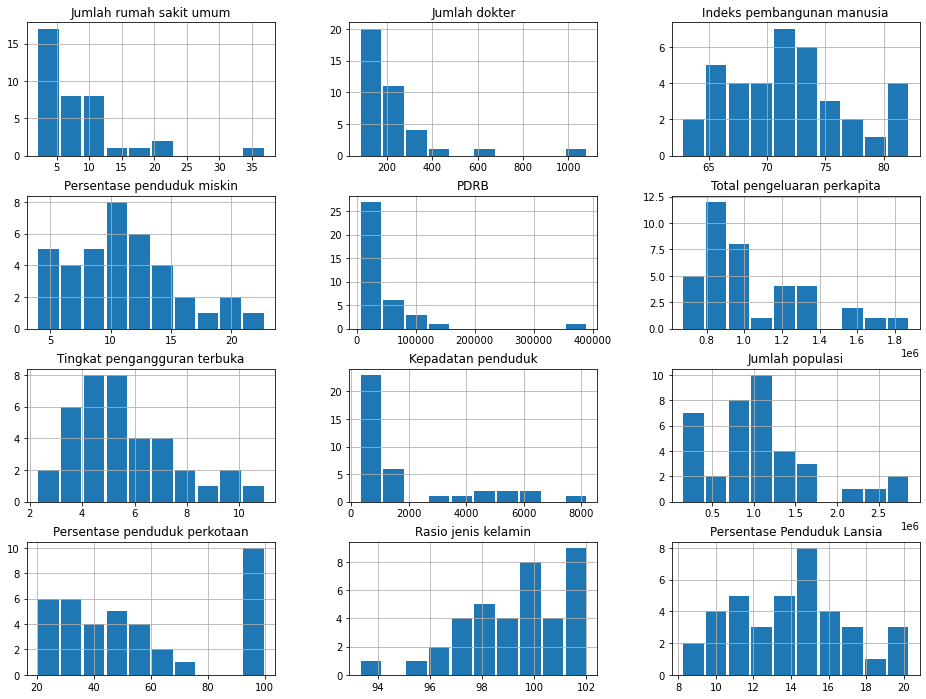

In [13]:
# visualisasi histogram
df.hist(figsize=(16, 12), rwidth=0.9)
plt.show

## Bivariate Analysis

In [14]:
# karena satuan data berbeda, data harus dinormalisasi
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# add kasus covid to dataframe
df['kasus covid'] = covid['konfirmasi (hari ini)']
#df['kasus meninggal'] = covid['fatality rate (hari ini)']

scaler = StandardScaler()
scaled_value = scaler.fit_transform(df)

# create dataframe from scaled data
df_scaled = pd.DataFrame(scaled_value, columns=df.columns, index=df.index)
df_scaled.to_csv('df_scaled.csv')
df_scaled.head()

Jumlah rumah sakit umum  Jumlah dokter  Indeks pembangunan manusia  \
0                -0.738208      -0.549675                   -1.558558   
1                 0.597597       0.604834                   -0.251189   
2                 0.003906      -0.134948                   -0.259222   
3                 0.152329       0.072415                   -0.568492   
4                -0.738208      -0.672972                   -1.092645   

   Persentase penduduk miskin      PDRB  Total pengeluaran perkapita  \
0                    2.116274 -0.385634                    -0.902932   
1                   -0.657004  0.165507                    -0.218516   
2                   -0.375239 -0.271174                    -0.581000   
3                    0.410153  0.418251                    -0.517185   
4                    0.698574 -0.448216                    -0.848516   

   Tingkat pengangguran terbuka  Kepadatan penduduk  Jumlah populasi  \
0                      1.591382           -0.415340        -0.014810   
1                     -0.143630           -0.782732         0.966785   
2                     -0.912499           -0.484106         0.232762   
3                     -0.356081           -0.639911         0.350798   
4                     -0.755690           -0.679824        -0.445533   

   Persentase penduduk perkotaan  Rasio jenis kelamin  \
0                      -0.920261            -1.035929   
1                       0.127980             0.495815   
2                      -0.414878             1.132777   
3                      -1.095860             0.809241   
4                      -0.610821            -1.142090   

   Persentase Penduduk Lansia  kasus covid  
0                   -0.335450    -0.257028  
1                    0.655991     0.721233  
2                    1.074306     0.422619  
3                    0.296964    -0.401075  
4                    0.823976    -0.416106

In [15]:
X = df_scaled.iloc[:,:-1]

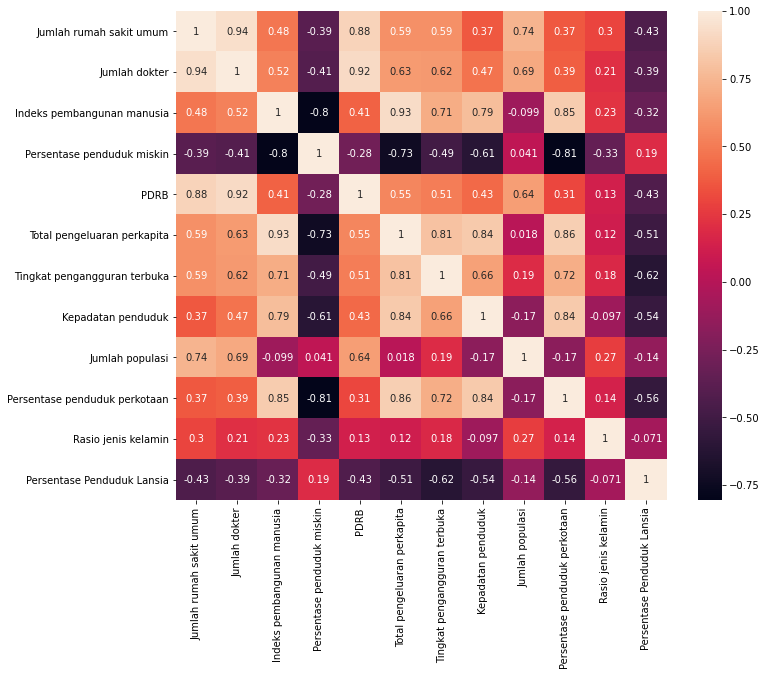

In [16]:
correlation_matrix = X.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [17]:
import plotly.express as px
fig = px.scatter_matrix(df_scaled, width=1300, height=1300)
fig.show()

In [18]:
x = df_scaled[['Jumlah rumah sakit umum', 'Jumlah dokter', 'Indeks pembangunan manusia', 'Persentase penduduk miskin',
    'PDRB', 'Total pengeluaran perkapita', 'Tingkat pengangguran terbuka', 'Kepadatan penduduk',
    'Persentase penduduk perkotaan', 'Rasio jenis kelamin', 'Persentase Penduduk Lansia', 'Jumlah populasi']]
ls = []
for i in x:
    for j in x:
        r, p = scipy.stats.pearsonr(df_scaled[i], df_scaled[j])
        var = [i, j, r, p]
        ls.append(var)
        #print(i, j, r, p, '\n')
col_name = ['var_1', 'var_2', 'r', 'p']
dt = pd.DataFrame(ls, columns = col_name)
dt.to_csv('p-value.csv')
dt.head()

var_1                       var_2         r             p
0  Jumlah rumah sakit umum     Jumlah rumah sakit umum  1.000000  0.000000e+00
1  Jumlah rumah sakit umum               Jumlah dokter  0.941669  1.314606e-18
2  Jumlah rumah sakit umum  Indeks pembangunan manusia  0.482034  2.180394e-03
3  Jumlah rumah sakit umum  Persentase penduduk miskin -0.387777  1.614868e-02
4  Jumlah rumah sakit umum                        PDRB  0.884825  1.698792e-13

In [19]:
#print(x)

In [20]:
#for i in x:
 #   print(i)

<AxesSubplot:>

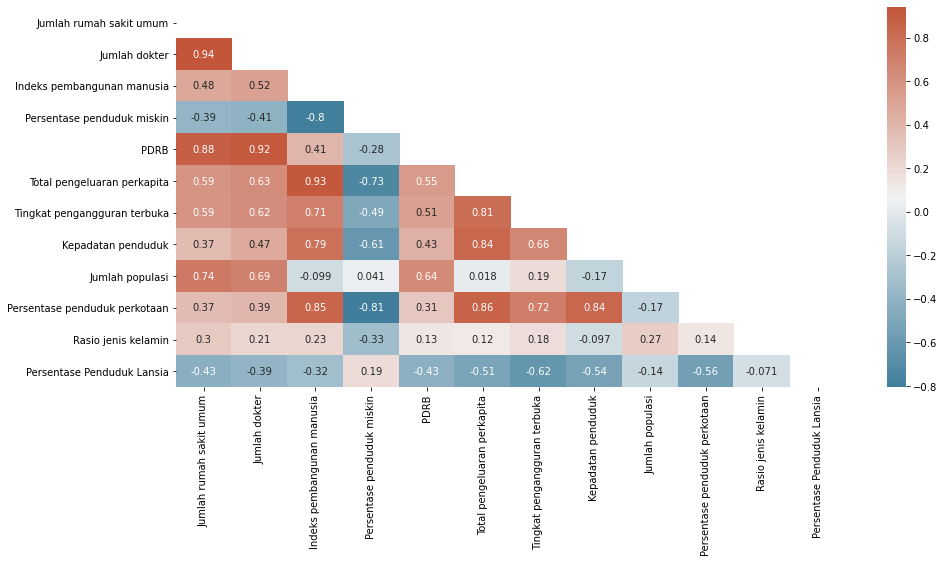

In [21]:
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# set up th matplotlib figure
fig, ax = plt.subplots(figsize=(15, 7))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True)

In [22]:
# find atribut with high correlation
sorted_matrix = correlation_matrix.unstack().sort_values()
high_correlation = sorted_matrix[sorted_matrix > 0.8]
print(high_correlation)

Total pengeluaran perkapita    Tingkat pengangguran terbuka     0.808695
Tingkat pengangguran terbuka   Total pengeluaran perkapita      0.808695
Total pengeluaran perkapita    Kepadatan penduduk               0.840754
Kepadatan penduduk             Total pengeluaran perkapita      0.840754
                               Persentase penduduk perkotaan    0.841932
Persentase penduduk perkotaan  Kepadatan penduduk               0.841932
                               Indeks pembangunan manusia       0.848402
Indeks pembangunan manusia     Persentase penduduk perkotaan    0.848402
Persentase penduduk perkotaan  Total pengeluaran perkapita      0.862916
Total pengeluaran perkapita    Persentase penduduk perkotaan    0.862916
Jumlah rumah sakit umum        PDRB                             0.884825
PDRB                           Jumlah rumah sakit umum          0.884825
                               Jumlah dokter                    0.919835
Jumlah dokter                  PDRB                

In [23]:
# cek nilai vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return (vif)

VIF1= calc_vif(x)
VIF1.sort_values(by=['VIF'], ascending=False, inplace=True)
VIF1

variables        VIF
1                   Jumlah dokter  21.492536
5     Total pengeluaran perkapita  18.950078
2      Indeks pembangunan manusia  16.987458
0         Jumlah rumah sakit umum  16.814689
8   Persentase penduduk perkotaan  13.275900
4                            PDRB   8.851103
11                Jumlah populasi   8.384699
7              Kepadatan penduduk   7.457013
3      Persentase penduduk miskin   6.032079
6    Tingkat pengangguran terbuka   4.824756
10     Persentase Penduduk Lansia   3.916174
9             Rasio jenis kelamin   1.928068

In [24]:
#VIF1.to_csv('vif awal.csv')

In [25]:
x1 = df_scaled[['Total pengeluaran perkapita', 'Indeks pembangunan manusia', 'Jumlah rumah sakit umum', 
               'Persentase penduduk perkotaan', 'PDRB', 'Jumlah populasi', 'Kepadatan penduduk',
               'Persentase penduduk miskin', 'Tingkat pengangguran terbuka', 'Persentase Penduduk Lansia',
               'Rasio jenis kelamin']]

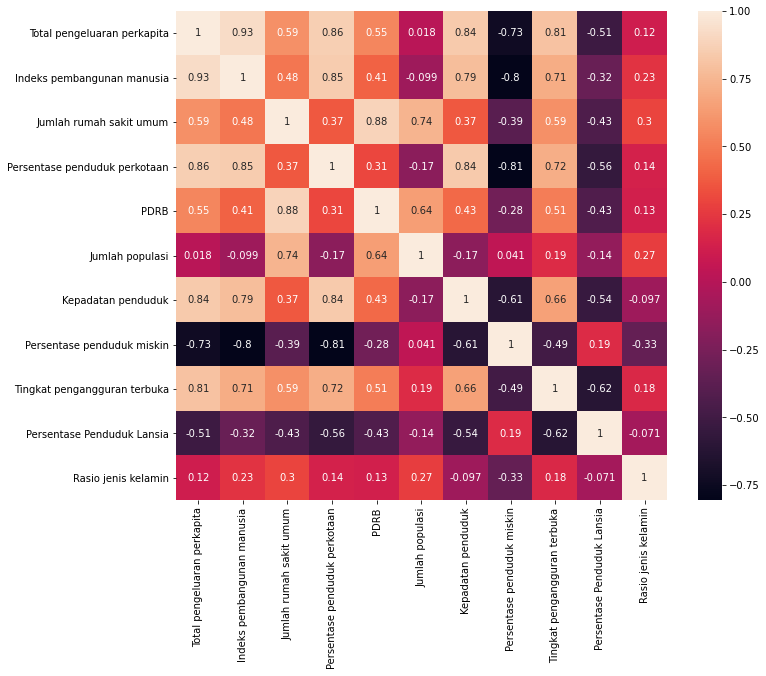

In [26]:
correlation_matrix = x1.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [27]:
# find atribut with high correlation
sorted_matrix = correlation_matrix.unstack().sort_values()
high_correlation = sorted_matrix[sorted_matrix > 0.8]
print(high_correlation)

Total pengeluaran perkapita    Tingkat pengangguran terbuka     0.808695
Tingkat pengangguran terbuka   Total pengeluaran perkapita      0.808695
Total pengeluaran perkapita    Kepadatan penduduk               0.840754
Kepadatan penduduk             Total pengeluaran perkapita      0.840754
Persentase penduduk perkotaan  Kepadatan penduduk               0.841932
Kepadatan penduduk             Persentase penduduk perkotaan    0.841932
Indeks pembangunan manusia     Persentase penduduk perkotaan    0.848402
Persentase penduduk perkotaan  Indeks pembangunan manusia       0.848402
Total pengeluaran perkapita    Persentase penduduk perkotaan    0.862916
Persentase penduduk perkotaan  Total pengeluaran perkapita      0.862916
PDRB                           Jumlah rumah sakit umum          0.884825
Jumlah rumah sakit umum        PDRB                             0.884825
Indeks pembangunan manusia     Total pengeluaran perkapita      0.927153
Total pengeluaran perkapita    Indeks pembangunan m

In [28]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return (vif)

VIF2= calc_vif(x1)
VIF2.sort_values(by=['VIF'], ascending=False, inplace=True)
VIF2

variables        VIF
0     Total pengeluaran perkapita  18.946782
1      Indeks pembangunan manusia  16.829667
2         Jumlah rumah sakit umum  14.187891
3   Persentase penduduk perkotaan  12.910454
5                 Jumlah populasi   7.293651
6              Kepadatan penduduk   6.530684
4                            PDRB   6.300980
7      Persentase penduduk miskin   5.958825
8    Tingkat pengangguran terbuka   4.432958
9      Persentase Penduduk Lansia   3.721907
10            Rasio jenis kelamin   1.924701

In [29]:
x2 = df_scaled[['Indeks pembangunan manusia', 'Jumlah rumah sakit umum', 
               'Persentase penduduk perkotaan', 'PDRB', 'Jumlah populasi', 'Kepadatan penduduk',
               'Persentase penduduk miskin', 'Tingkat pengangguran terbuka', 'Persentase Penduduk Lansia',
               'Rasio jenis kelamin']]

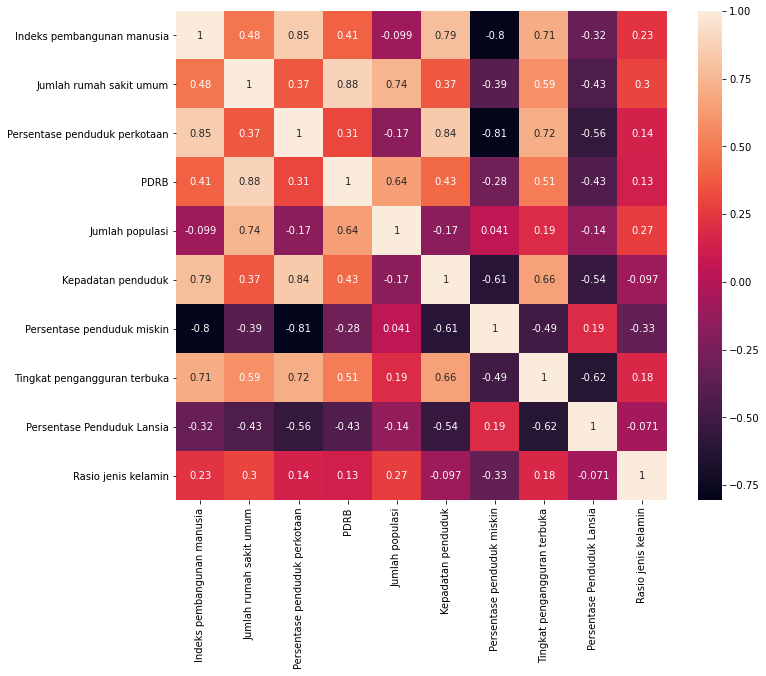

In [30]:
correlation_matrix = x2.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
# find atribut with high correlation
sorted_matrix = correlation_matrix.unstack().sort_values()
high_correlation = sorted_matrix[sorted_matrix > 0.8]
print(high_correlation)

Kepadatan penduduk             Persentase penduduk perkotaan    0.841932
Persentase penduduk perkotaan  Kepadatan penduduk               0.841932
                               Indeks pembangunan manusia       0.848402
Indeks pembangunan manusia     Persentase penduduk perkotaan    0.848402
Jumlah rumah sakit umum        PDRB                             0.884825
PDRB                           Jumlah rumah sakit umum          0.884825
Indeks pembangunan manusia     Indeks pembangunan manusia       1.000000
Tingkat pengangguran terbuka   Tingkat pengangguran terbuka     1.000000
Persentase penduduk miskin     Persentase penduduk miskin       1.000000
Kepadatan penduduk             Kepadatan penduduk               1.000000
Jumlah populasi                Jumlah populasi                  1.000000
PDRB                           PDRB                             1.000000
Persentase penduduk perkotaan  Persentase penduduk perkotaan    1.000000
Jumlah rumah sakit umum        Jumlah rumah sakit u

In [32]:
VIF3= calc_vif(x2)
VIF3.sort_values(by=['VIF'], ascending=False, inplace=True)
VIF3

variables        VIF
1        Jumlah rumah sakit umum  14.016918
2  Persentase penduduk perkotaan  12.903538
0     Indeks pembangunan manusia  10.508758
4                Jumlah populasi   7.219158
5             Kepadatan penduduk   6.485068
3                           PDRB   6.109537
6     Persentase penduduk miskin   5.798882
7   Tingkat pengangguran terbuka   3.860512
8     Persentase Penduduk Lansia   3.549032
9            Rasio jenis kelamin   1.701197

In [33]:
x3 = df_scaled[['Persentase penduduk perkotaan', 'Indeks pembangunan manusia', 'Jumlah populasi', 'Kepadatan penduduk',
               'PDRB', 'Persentase penduduk miskin', 'Tingkat pengangguran terbuka', 'Persentase Penduduk Lansia',
               'Rasio jenis kelamin']]

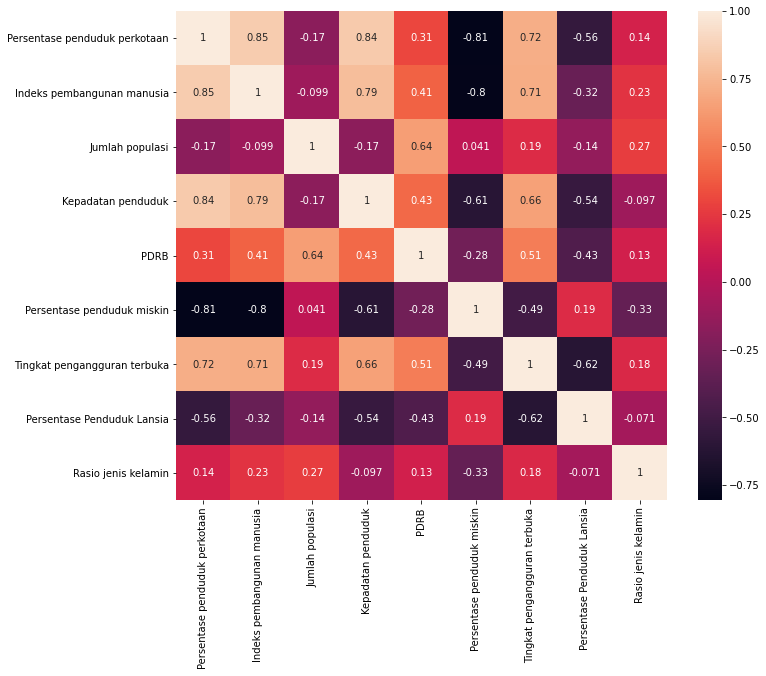

In [34]:
correlation_matrix = x3.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [35]:
# find atribut with high correlation
sorted_matrix = correlation_matrix.unstack().sort_values()
high_correlation = sorted_matrix[sorted_matrix > 0.8]
print(high_correlation)

Persentase penduduk perkotaan  Kepadatan penduduk               0.841932
Kepadatan penduduk             Persentase penduduk perkotaan    0.841932
Persentase penduduk perkotaan  Indeks pembangunan manusia       0.848402
Indeks pembangunan manusia     Persentase penduduk perkotaan    0.848402
Persentase penduduk perkotaan  Persentase penduduk perkotaan    1.000000
PDRB                           PDRB                             1.000000
Tingkat pengangguran terbuka   Tingkat pengangguran terbuka     1.000000
Persentase penduduk miskin     Persentase penduduk miskin       1.000000
Kepadatan penduduk             Kepadatan penduduk               1.000000
Jumlah populasi                Jumlah populasi                  1.000000
Indeks pembangunan manusia     Indeks pembangunan manusia       1.000000
Persentase Penduduk Lansia     Persentase Penduduk Lansia       1.000000
Rasio jenis kelamin            Rasio jenis kelamin              1.000000
dtype: float64


In [36]:
VIF4= calc_vif(x3)
VIF4.sort_values(by=['VIF'], ascending=False, inplace=True)
VIF4

variables        VIF
0  Persentase penduduk perkotaan  12.901771
1     Indeks pembangunan manusia   7.871868
3             Kepadatan penduduk   6.308420
5     Persentase penduduk miskin   5.791097
4                           PDRB   4.034977
6   Tingkat pengangguran terbuka   3.847388
2                Jumlah populasi   3.624078
7     Persentase Penduduk Lansia   3.273682
8            Rasio jenis kelamin   1.699793

In [37]:
x4 = df_scaled[['Indeks pembangunan manusia', 'Kepadatan penduduk', 'Persentase penduduk miskin', 'PDRB',
               'Tingkat pengangguran terbuka', 'Jumlah populasi', 'Persentase Penduduk Lansia',
               'Rasio jenis kelamin']]

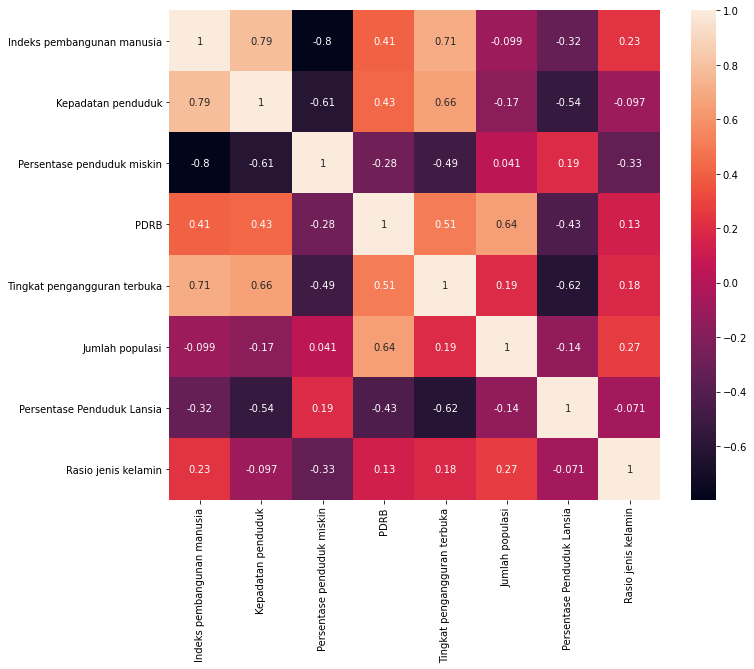

In [38]:
corr_matrix = x4.corr()
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [39]:
# find atribut with high correlation
sorted_matrix = corr_matrix.unstack().sort_values()
high_correlation = sorted_matrix[sorted_matrix > 0.8 ]
print(high_correlation)

Indeks pembangunan manusia    Indeks pembangunan manusia      1.0
Jumlah populasi               Jumlah populasi                 1.0
Tingkat pengangguran terbuka  Tingkat pengangguran terbuka    1.0
PDRB                          PDRB                            1.0
Persentase penduduk miskin    Persentase penduduk miskin      1.0
Kepadatan penduduk            Kepadatan penduduk              1.0
Persentase Penduduk Lansia    Persentase Penduduk Lansia      1.0
Rasio jenis kelamin           Rasio jenis kelamin             1.0
dtype: float64


In [40]:
VIF5= calc_vif(x4)
VIF5.sort_values(by=['VIF'], ascending=False, inplace=True)
VIF5

variables       VIF
0    Indeks pembangunan manusia  7.437029
1            Kepadatan penduduk  5.565873
3                          PDRB  3.813169
4  Tingkat pengangguran terbuka  3.635856
5               Jumlah populasi  3.569340
2    Persentase penduduk miskin  3.261663
6    Persentase Penduduk Lansia  2.332280
7           Rasio jenis kelamin  1.685515

In [41]:
x5 = df_scaled[['Kepadatan penduduk', 'PDRB', 'Tingkat pengangguran terbuka',
               'Jumlah populasi', 'Persentase penduduk miskin', 'Persentase Penduduk Lansia',
               'Rasio jenis kelamin']]

In [42]:
VIF6= calc_vif(x5)
VIF6.sort_values(by=['VIF'], ascending=False, inplace=True)
VIF6

variables       VIF
0            Kepadatan penduduk  4.701245
1                          PDRB  3.512652
3               Jumlah populasi  3.160416
2  Tingkat pengangguran terbuka  2.608596
4    Persentase penduduk miskin  2.413555
5    Persentase Penduduk Lansia  1.971607
6           Rasio jenis kelamin  1.547297

In [43]:
X = df_scaled[['Kepadatan penduduk', 'PDRB', 'Jumlah populasi', 'Tingkat pengangguran terbuka',
              'Persentase penduduk miskin', 'Persentase Penduduk Lansia', 'Rasio jenis kelamin']]
Y = df_scaled[['kasus covid']]

In [44]:
#pars = df_scaled[['Persentase penduduk miskin', 'PDRB',
              #'Tingkat pengangguran terbuka', 'Kepadatan penduduk',
              #'Jumlah populasi', 'Rasio jenis kelamin', 'Persentase Penduduk Lansia', 'kasus covid']]

In [45]:
#!pip install pingouin

In [46]:
#import pingouin as pg

In [47]:
#pars.pcorr()

## Multivariate Analysis

In [48]:
X = sm.add_constant(X)

In [49]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            kasus covid   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     34.72
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           1.08e-12
Time:                        16:57:28   Log-Likelihood:                -11.962
No. Observations:                  38   AIC:                             39.92
Df Residuals:                      30   BIC:                             53.02
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [50]:
predictions

0    -0.171084
1     0.410565
2    -0.070359
3     0.233613
4    -0.408628
5     0.350768
6     0.618138
7    -0.044340
8    -0.002317
9    -0.153522
10   -0.413706
11   -0.183018
12    0.003601
13    0.785931
14   -0.097169
15   -0.279432
16   -0.145760
17   -0.355983
18   -0.994978
19    0.424165
20    0.004109
21   -0.458916
22   -1.089584
23    1.412445
24   -0.639739
25   -0.447830
26   -0.395696
27   -0.251122
28   -0.107541
29   -0.838139
30   -0.438778
31    0.147266
32    0.134086
33    0.495899
34   -0.494290
35   -0.753109
36   -0.679776
37    4.894231
dtype: float64

In [51]:
residual = Y['kasus covid']-predictions

In [52]:
mean_residuals = np.mean(residual)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -4.762272447734224e-16


C:\Users\Siti Nur Hasanah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



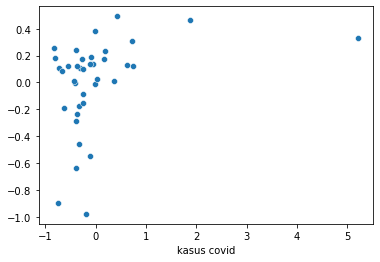

In [53]:
p = sns.scatterplot(Y['kasus covid'],residual)

In [54]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X)
lzip(name, test)

[('F statistic', 1.441514850146802), ('p-value', 0.2771843640889238)]

In [55]:
print(model.pvalues)

const                           1.000000
Kepadatan penduduk              0.142304
PDRB                            0.000002
Jumlah populasi                 0.014925
Tingkat pengangguran terbuka    0.059786
Persentase penduduk miskin      0.749029
Persentase Penduduk Lansia      0.000602
Rasio jenis kelamin             0.598539
dtype: float64


In [56]:
print('F-statistic:', model.fvalue)

F-statistic: 34.71501173788883


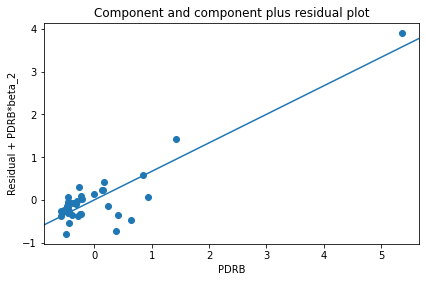

In [57]:
fig = sm.graphics.plot_ccpr(model, "PDRB")
fig.tight_layout(pad=1.0)

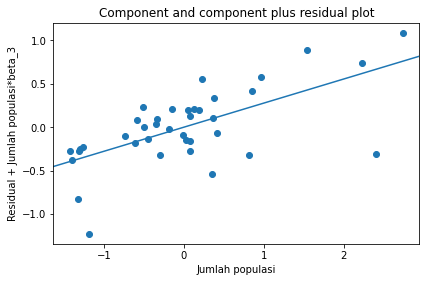

In [58]:
fig = sm.graphics.plot_ccpr(model, "Jumlah populasi")
fig.tight_layout(pad=1.0)

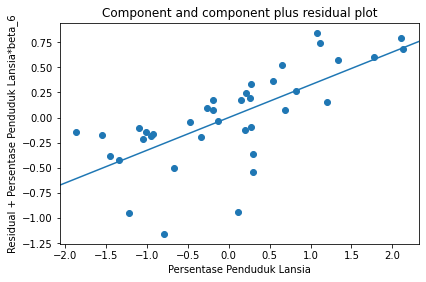

In [59]:
fig = sm.graphics.plot_ccpr(model, "Persentase Penduduk Lansia")
fig.tight_layout(pad=1.0)

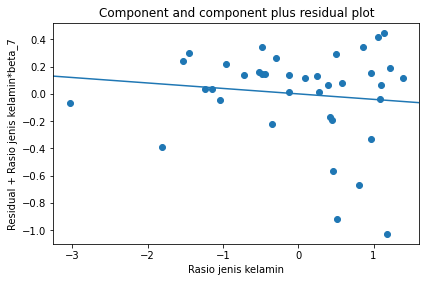

In [60]:
fig = sm.graphics.plot_ccpr(model, "Rasio jenis kelamin")
fig.tight_layout(pad=1.0)

In [61]:
all_data = df_scaled[['Persentase penduduk miskin', 'PDRB',
              'Tingkat pengangguran terbuka', 'Kepadatan penduduk',
              'Jumlah populasi', 'Rasio jenis kelamin', 'Persentase Penduduk Lansia', 'kasus covid']]

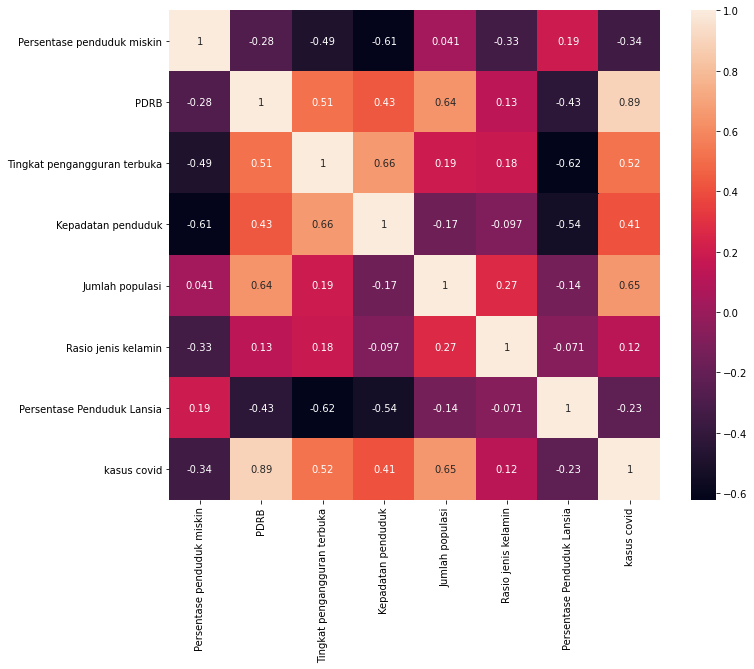

In [62]:
corr_matrix = all_data.corr()
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## EDA COVID

In [63]:
data_covid = pd.read_excel('C:/Users/Siti Nur Hasanah/skripsi/praproses/dataset-june.xlsx')
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17784 entries, 0 to 17783
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   kabupaten/kota            17784 non-null  object        
 1   terakhir update           17784 non-null  datetime64[ns]
 2   fatality rate (hari ini)  17784 non-null  float64       
 3   konfirmasi (hari ini)     17784 non-null  int64         
 4   konfirmasi (sebelum)      17784 non-null  int64         
 5   konfirmasi (penambahan)   17784 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 833.8+ KB


In [64]:
# Function to plot interative plot plot
def interactive_plot(df, column_name, title):
    fig = px.line(title = title)
    for i in df['kabupaten/kota'].unique():
        d = df[df['kabupaten/kota']==i]
        fig.add_scatter(x = d['terakhir update'], y=d[column_name], name=i )
    fig.show()
    

In [65]:
# Plot interactive chart
interactive_plot(data_covid, 'konfirmasi (hari ini)', 'Jumlah Kasus Positif COVID-19')